<font size=6>**<center>Travel Survey Case study and Conduct in UIC**</center></font>

<font size=3><center>李文萱</center></font>


# Import the packages needed

In [28]:
# NumPy: A Python library used for convert list to arrays
import numpy as np

# pd: Package for data analysis and manipulation tools
import pandas as pd

# plt: Module that import names for the opencv-python library to solve computer vision problems.
import matplotlib.pyplot as plt

# math: There are operations that can be efficiently solved in mathematics
import math

# random: Used to generate the random sample
import random

# os: Modules provide functionality for working with folders
import os

# seaborn: A statistical charting library based on the unified data structure of matplotlib and Pandas
import seaborn as sns

# Ignore the warnings we meet
import warnings

# Used to draw the wordcloud
import wordcloud
from wordcloud import WordCloud

# stats: use to calculate the chi-square test
import scipy.stats as stats

warnings.filterwarnings("ignore")

# Set the default plot style
sns.set_style('whitegrid')
plt.style.use("ggplot")

plt.rcParams['font.sans-serif'] = ['SimHei']

plt.rcParams['axes.unicode_minus'] = False

In [29]:
data = pd.read_csv('Survey.csv', encoding = 'GB2312')
data

,1,2,3,4,5,6_1,6_2,6_3,7,8,...,12_3,12_4,13,14,15_1,15_2,15_3,15_4,16,17
0,1,4,1,广东省,1,1,0,1,1,1,...,0,0,1,2,-3,-3,-3,-3,1,汕头
1,1,4,1,福建省,1,1,0,0,3,3,...,0,0,1,2,-3,-3,-3,-3,2,-3
2,1,1,1,天津市,1,1,0,0,3,3,...,0,0,1,1,-3,-3,-3,-3,1,西藏
3,1,1,4,北京市,2,1,1,1,3,3,...,0,0,2,-3,1,0,1,0,1,出国
4,1,4,2,广东省,3,1,0,1,3,2,...,0,0,2,-3,1,0,1,1,1,(空)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1,3,3,河北省,1,1,1,0,2,1,...,1,1,1,1,-3,-3,-3,-3,1,北京市
237,1,1,2,山东省,2,1,0,0,2,2,...,0,1,1,1,-3,-3,-3,-3,1,九寨沟
238,2,4,4,广东省,3,0,1,0,3,4,...,1,0,2,-3,0,0,1,0,2,-3
239,1,2,2,江苏省,1,1,1,1,2,2,...,0,1,1,1,-3,-3,-3,-3,1,辽宁省大连


# Bar Chart & Pie Chart of Question 1

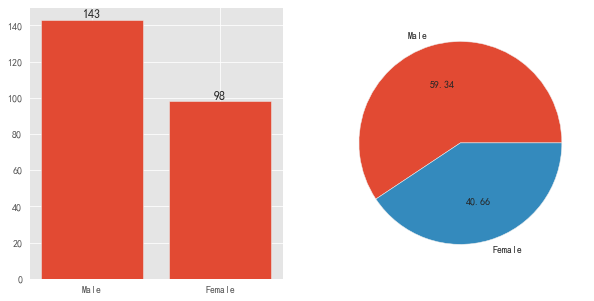

In [30]:
# Get the basic data
total = len(data)
Male = len(data[data['1'] == 1])
Female = len(data[data['1'] == 2])

# Get the data used to draw
X = ['Male', 'Female']
Y_num = [Male, Female]
Y_percent = [Male / total, Female / total]

# Use subplot to combine multiple figures
fig, ax = plt.subplots(1, 2, figsize = (10,5))

fig.patch.set_facecolor('none')

# Draw the first figure: Bar Chart
ax[0].bar(X, Y_num)
for a, b in zip(X, Y_num):
    ax[0].text(a, b, "{:.0f}".format(b), ha='center', va='bottom', fontsize=12)


# Draw the second figure: Pie Chart
ax[1].pie(x = Y_num, labels = X, autopct = '%.2f')


plt.savefig('Gender distribution in the questionnaire', dpi = 500)

plt.show()

# Bar Chart & Pie Chart of Question 2

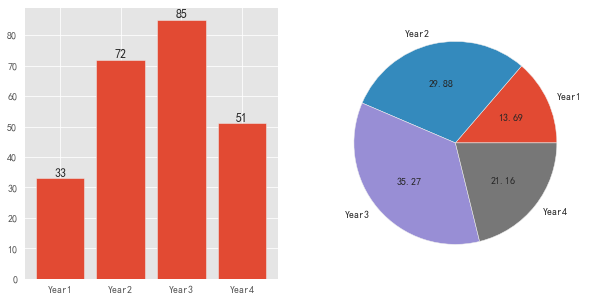

In [31]:
# Get the basic data
total = len(data)
y1 = len(data[data['2'] == 1])
y2 = len(data[data['2'] == 2])
y3 = len(data[data['2'] == 3])
y4 = len(data[data['2'] == 4])

# Get the data used to draw
X = ['Year1', 'Year2', 'Year3', 'Year4']
Y_num = [y1, y2, y3, y4]
Y_percent = [y1 / total, y2 / total, y3 / total, y4 / total]

# Use subplot to combine multiple figures
fig, ax = plt.subplots(1, 2, figsize = (10,5))

fig.patch.set_facecolor('none')

# Draw the first figure: Bar Chart
ax[0].bar(X, Y_num)
for a, b in zip(X, Y_num):
    ax[0].text(a, b, "{:.0f}".format(b), ha='center', va='bottom', fontsize=12)


# Draw the second figure: Pie Chart
ax[1].pie(x = Y_num, labels = X, autopct = '%.2f')


plt.savefig('Grade distribution in the questionnaire', dpi = 500)

plt.show()

# Bar Chart & Pie Chart of Question 3

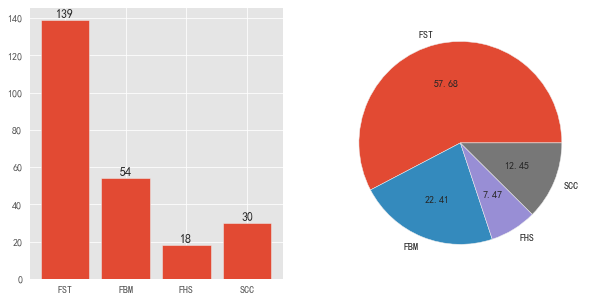

In [32]:
# Get the basic data
total = len(data)
FST = len(data[data['3'] == 1])
FBM = len(data[data['3'] == 2])
FHS = len(data[data['3'] == 3])
SCC = len(data[data['3'] == 4])

# Get the data used to draw
X = ['FST', 'FBM', 'FHS', 'SCC']
Y_num = [FST, FBM, FHS, SCC]
Y_percent = [FST / total, FBM / total, FHS / total, SCC / total]

# Use subplot to combine multiple figures
fig, ax = plt.subplots(1, 2, figsize = (10,5))

fig.patch.set_facecolor('none')

# Draw the first figure: Bar Chart
ax[0].bar(X, Y_num)
for a, b in zip(X, Y_num):
    ax[0].text(a, b, "{:.0f}".format(b), ha='center', va='bottom', fontsize=12)


# Draw the second figure: Pie Chart
ax[1].pie(x = Y_num, labels = X, autopct = '%.2f')


plt.savefig('Faculty distribution in the questionnaire', dpi = 500)

plt.show()

# Wordcloud of Question 4

In [33]:
List = []
for i in range(len(data)):
    List.append(data['4'][i])
string = ' '.join(List)
string

'广东省 福建省 天津市 北京市 广东省 四川省 山西省 辽宁省 四川省 广东省 湖南省 安徽省 浙江省 山东省 山东省 河北省 内蒙古 江苏省 福建省 广东省 安徽省 湖北省 广东省 广东省 浙江省 甘肃省 福建省 河北省 山东省 福建省 江西省 河南省 广东省 广西省 吉林省 山东省 内蒙古 海南省 福建省 黑龙江省 黑龙江省 辽宁省 辽宁省 贵州省 福建省 甘肃省 广东省 宁夏省 广东省 黑龙江省 山东省 云南省 湖北省 江苏省 江苏省 四川省 吉林省 山东省 吉林省 广东省 江苏省 山西省 广西省 辽宁省 四川省 黑龙江省 吉林省 河南省 四川省 黑龙江省 江苏省 辽宁省 山东省 江苏省 安徽省 黑龙江省 安徽省 辽宁省 吉林省 山东省 山西省 湖北省 江苏省 吉林省 辽宁省 陕西省 贵州省 山东省 甘肃省 河北省 江苏省 河南省 海南省 山东省 河南省 湖北省 海南省 广西省 辽宁省 福建省 四川省 宁夏省 山东省 河北省 山西省 云南省 内蒙古 福建省 四川省 浙江省 山东省 山东省 浙江省 云南省 湖北省 陕西省 山东省 浙江省 广东省 辽宁省 辽宁省 江西省 辽宁省 河北省 广西省 河北省 辽宁省 山东省 广东省 江苏省 四川省 云南省 江苏省 浙江省 江苏省 广东省 山东省 贵州省 云南省 甘肃省 陕西省 黑龙江省 江苏省 山东省 浙江省 四川省 广东省 福建省 吉林省 山东省 陕西省 江苏省 浙江省 广东省 福建省 广东省 云南省 山西省 江苏省 四川省 福建省 广西省 福建省 吉林省 四川省 广东省 广东省 广东省 浙江省 江苏省 河北省 河北省 吉林省 江苏省 浙江省 广东省 浙江省 山东省 山西省 陕西省 山东省 辽宁省 陕西省 河北省 宁夏省 山东省 湖北省 山西省 湖北省 云南省 广东省 江苏省 广东省 贵州省 黑龙江省 广西省 河北省 海南省 浙江省 广东省 内蒙古 山东省 甘肃省 云南省 浙江省 江苏省 贵州省 山东省 山西省 安徽省 辽宁省 辽宁省 陕西省 辽宁省 四川省 广东省 四川省 广西省 甘肃省 辽宁省 河北省 辽宁省 河南省 河南省 山西省 吉林省 广西省 湖北省 吉林省 广东省 山东省 山东省 辽宁省 辽宁省 山东省 福建省 河北省 山东省 广东省 江苏省 福建省'

In [7]:
font = r'C:\Windows\Fonts\STFANGSO.TTF'

wc = WordCloud(
    background_color='white',
    width=1000,
    height=800,
    font_path=font
)

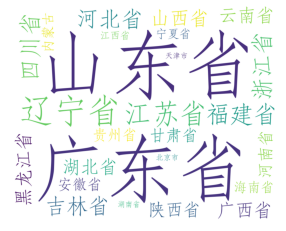

In [34]:
wc.generate_from_text(string)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [35]:
male = data[data['1']==1]
female = data[data['1']==2]


male = male.sample(30, random_state=100,axis=0)
female = female.sample(70, random_state=100,axis=0)

data = male.append(female)
data = data.reset_index(drop = True)
data

,1,2,3,4,5,6_1,6_2,6_3,7,8,...,12_3,12_4,13,14,15_1,15_2,15_3,15_4,16,17
0,1,3,1,河北省,1,1,1,1,2,2,...,0,0,2,-3,0,1,1,0,2,-3
1,1,2,2,山东省,1,1,0,0,3,2,...,0,0,2,-3,0,1,0,0,2,-3
2,1,2,2,内蒙古,2,1,0,1,2,2,...,1,1,2,-3,0,0,1,0,2,-3
3,1,2,1,山东省,1,1,0,0,2,1,...,1,1,2,-3,0,1,1,0,1,重庆
4,1,2,1,黑龙江省,1,1,0,1,2,2,...,1,1,1,1,-3,-3,-3,-3,1,哈尔滨市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,4,1,山东省,2,1,0,0,3,4,...,0,1,1,2,-3,-3,-3,-3,2,-3
96,2,4,1,广东省,2,1,0,0,4,5,...,1,1,2,-3,0,0,1,0,2,-3
97,2,3,1,浙江省,2,1,0,0,2,3,...,1,1,2,-3,0,0,1,0,2,-3
98,2,4,1,贵州省,2,0,0,1,3,4,...,0,1,2,-3,0,0,1,0,2,-3


In [25]:
num

42

# Bar Chart & Pie Chart of Question 5 and Analysis

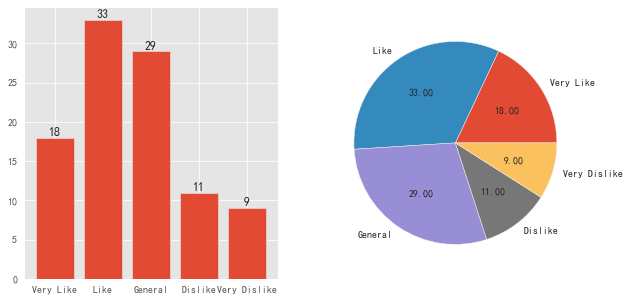

In [44]:
# Get the basic data
total = len(data)
very_like = len(data[data['5'] == 1])
like = len(data[data['5'] == 2])
general = len(data[data['5'] == 3])
dislike = len(data[data['5'] == 4])
vary_dislike = len(data[data['5'] == 5])

# Get the data used to draw
X = ['Very Like', 'Like', 'General', 'Dislike', 'Very Dislike']
Y_num = [very_like, like, general, dislike, vary_dislike]
Y_percent = [very_like / total, like / total, general / total, dislike / total, vary_dislike / total]

# Use subplot to combine multiple figures
fig, ax = plt.subplots(1, 2, figsize = (10,5))

fig.patch.set_facecolor('none')

# Draw the first figure: Bar Chart
ax[0].bar(X, Y_num)
for a, b in zip(X, Y_num):
    ax[0].text(a, b, "{:.0f}".format(b), ha='center', va='bottom', fontsize=12)


# Draw the second figure: Pie Chart
ax[1].pie(x = Y_num, labels = X, autopct = '%.2f')


plt.savefig('Travel like distribution in the questionnaire', dpi = 500)

plt.show()

In [37]:
a = pd.crosstab(index = data['1'], columns = data['5'])
a

5,1,2,3,4,5
1,,,,,
1,18,8,3,1,0
2,0,25,26,10,9


In [38]:
stats.chi2_contingency(a)

(54.00308503756779,
 5.2548586341830185e-11,
 4,
 array([[ 5.4,  9.9,  8.7,  3.3,  2.7],
        [12.6, 23.1, 20.3,  7.7,  6.3]]))

# Bar Chart & Pie Chart of Question 7 and Analysis

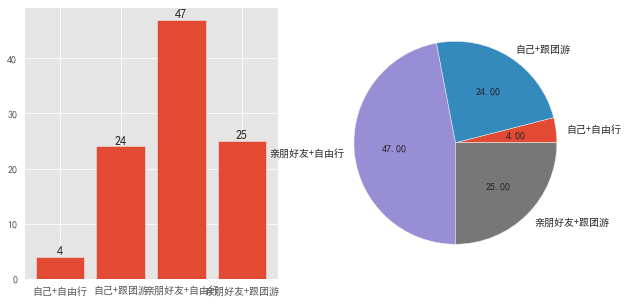

In [39]:
# Get the basic data
total = len(data)
alone_free = len(data[data['7'] == 1])
alone_group = len(data[data['7'] == 2])
friends_free = len(data[data['7'] == 3])
friends_group = len(data[data['7'] == 4])

# Get the data used to draw
X = ['自己+自由行', '自己+跟团游', '亲朋好友+自由行', '亲朋好友+跟团游']
Y_num = [alone_free, alone_group, friends_free, friends_group]
Y_percent = [alone_free / total, alone_group / total, friends_free / total, friends_group / total]

# Use subplot to combine multiple figures
fig, ax = plt.subplots(1, 2, figsize = (10,5))

fig.patch.set_facecolor('none')

# Draw the first figure: Bar Chart
ax[0].bar(X, Y_num)
for a, b in zip(X, Y_num):
    ax[0].text(a, b, "{:.0f}".format(b), ha='center', va='bottom', fontsize=12)


# Draw the second figure: Pie Chart
ax[1].pie(x = Y_num, labels = X, autopct = '%.2f')


plt.savefig('Travel style distribution in the questionnaire', dpi = 500)

plt.show()

In [40]:
a = pd.crosstab(index = data['1'], columns = data['7'])
a

7,1,2,3,4
1,,,,
1,4,19,7,0
2,0,5,40,25


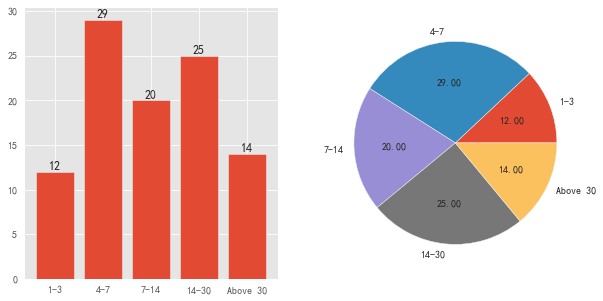

In [45]:
# Get the basic data
total = len(data)
a = len(data[data['8'] == 1])
b = len(data[data['8'] == 2])
c = len(data[data['8'] == 3])
d = len(data[data['8'] == 4])
e = len(data[data['8'] == 5])

# Get the data used to draw
X = ['1-3', '4-7', '7-14', '14-30', 'Above 30']
Y_num = [a,b,c,d,e]
Y_percent = [a / total, b / total, c / total, d / total, e/total]

# Use subplot to combine multiple figures
fig, ax = plt.subplots(1, 2, figsize = (10,5))

fig.patch.set_facecolor('none')

# Draw the first figure: Bar Chart
ax[0].bar(X, Y_num)
for a, b in zip(X, Y_num):
    ax[0].text(a, b, "{:.0f}".format(b), ha='center', va='bottom', fontsize=12)


# Draw the second figure: Pie Chart
ax[1].pie(x = Y_num, labels = X, autopct = '%.2f')


plt.savefig('Travel style distribution in the questionnaire', dpi = 500)

plt.show()

In [46]:
a = pd.crosstab(index = data['1'], columns = data['8'])
a

8,1,2,3,4,5
1,,,,,
1,12,18,0,0,0
2,0,11,20,25,14


In [47]:
stats.chi2_contingency(a)

(67.48768472906404,
 7.693311350274222e-14,
 4,
 array([[ 3.6,  8.7,  6. ,  7.5,  4.2],
        [ 8.4, 20.3, 14. , 17.5,  9.8]]))

In [48]:
a = pd.crosstab(index = data['1'], columns = data['9'])
a

9,1,2,3,4
1,,,,
1,4,21,5,0
2,0,14,43,13


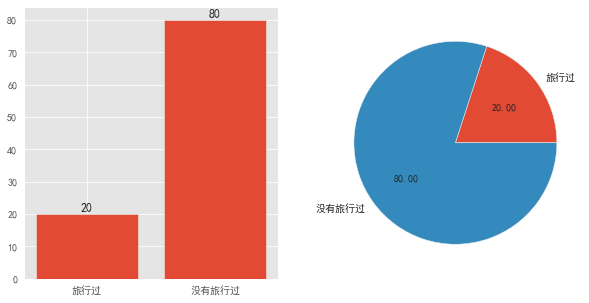

In [42]:
# Get the basic data
total = len(data)
yes = len(data[data['13'] == 1])
no = len(data[data['13'] == 2])

# Get the data used to draw
X = ['旅行过', '没有旅行过']
Y_num = [yes, no]
Y_percent = [yes / total, no / total]

# Use subplot to combine multiple figures
fig, ax = plt.subplots(1, 2, figsize = (10,5))

fig.patch.set_facecolor('none')

# Draw the first figure: Bar Chart
ax[0].bar(X, Y_num)
for a, b in zip(X, Y_num):
    ax[0].text(a, b, "{:.0f}".format(b), ha='center', va='bottom', fontsize=12)


# Draw the second figure: Pie Chart
ax[1].pie(x = Y_num, labels = X, autopct = '%.2f')


plt.savefig('Travel like distribution in the questionnaire', dpi = 500)

plt.show()

In [ ]:
# Get the basic data
total = len(data)
alone_free = len(data[data['7'] == 1])
alone_group = len(data[data['7'] == 2])
friends_free = len(data[data['7'] == 3])
friends_group = len(data[data['7'] == 4])

# Get the data used to draw
X = ['自己+自由行', '自己+跟团游', '亲朋好友+自由行', '亲朋好友+跟团游']
Y_num = [alone_free, alone_group, friends_free, friends_group]
Y_percent = [alone_free / total, alone_group / total, friends_free / total, friends_group / total]

# Use subplot to combine multiple figures
fig, ax = plt.subplots(1, 2, figsize = (10,5))

fig.patch.set_facecolor('none')

# Draw the first figure: Bar Chart
ax[0].bar(X, Y_num)
for a, b in zip(X, Y_num):
    ax[0].text(a, b, "{:.0f}".format(b), ha='center', va='bottom', fontsize=12)


# Draw the second figure: Pie Chart
ax[1].pie(x = Y_num, labels = X, autopct = '%.2f')


plt.savefig('Travel style distribution in the questionnaire', dpi = 500)

plt.show()

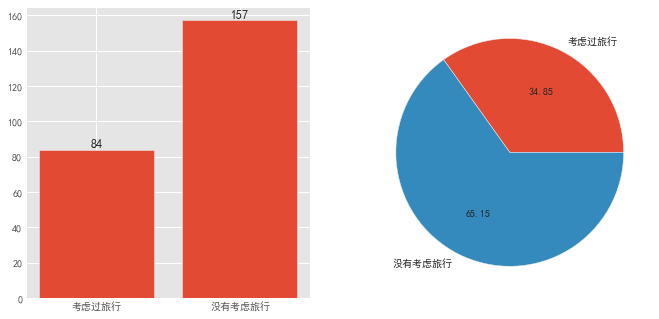

In [142]:
# Get the basic data
total = len(data)
yes = len(data[data['16'] == 1])
no = len(data[data['16'] == 2])

# Get the data used to draw
X = ['考虑过旅行', '没有考虑旅行']
Y_num = [yes, no]
Y_percent = [yes / total, no / total]

# Use subplot to combine multiple figures
fig, ax = plt.subplots(1, 2, figsize = (10,5))

fig.patch.set_facecolor('none')

# Draw the first figure: Bar Chart
ax[0].bar(X, Y_num)
for a, b in zip(X, Y_num):
    ax[0].text(a, b, "{:.0f}".format(b), ha='center', va='bottom', fontsize=12)


# Draw the second figure: Pie Chart
ax[1].pie(x = Y_num, labels = X, autopct = '%.2f')


plt.savefig('Travel like distribution in the questionnaire', dpi = 500)

plt.show()